In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rc('font', family="serif")
plt.rc('font', size=16)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}') #necessary to use \dfrac
plt.rc('figure', figsize=(6,4)) 

In [9]:
import jax
from jax import (
    jit as jjit,
    numpy as jnp,
    vmap,
    grad,
    random as jran,
)

### lax.scan: Lotka-Volterra Equations: Predator-Prey Model

The **Lotka-Volterra equations**, also known as the Lotka–Volterra predator–prey model, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey:

- **Rabbits** ($R$) as the **prey**  
- **Wolves** ($W$) as the **predators**  

The population dynamics follow these **ordinary differential equations (ODEs)**:

$$
\frac{dR}{dt} = \alpha R - \beta R W
$$

$$
\frac{dW}{dt} = \delta R W - \gamma W
$$

where:  
- $\alpha$ is the **birth rate** of rabbits.  
- $\beta$ is the **predation rate** (rate at which wolves eat rabbits).  
- $\gamma$ is the **mortality rate** of wolves.  
- $\delta$ is the **reproduction rate** of wolves per rabbit consumed.  

### Biological Interpretation:
- Rabbits **reproduce exponentially** if no predators exist.  
- Wolves **depend on rabbits** for food and their population grows when prey is abundant.  
- The system results in **cyclic population dynamics**, where predator and prey numbers rise and fall periodically.

In the next section, we solve this system **numerically** using Euler’s method and JAX's `lax.scan` function.


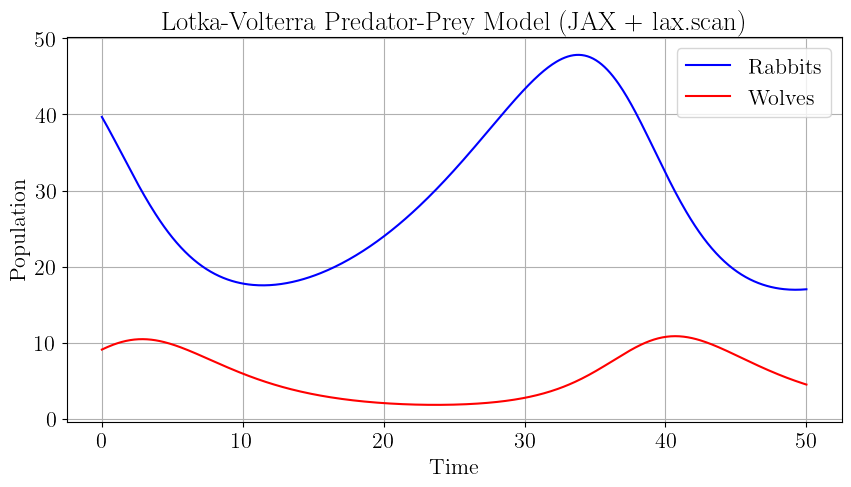

In [10]:
# Define parameters
alpha = 0.1   # Rabbit birth rate
beta = 0.02   # Predation rate
gamma = 0.3   # Wolf mortality rate
delta = 0.01  # Wolf reproduction rate

dt = 0.1      # Time step
num_steps = 500  # Total simulation steps

# Lotka-Volterra function using Euler's method
def lotka_volterra(state, _):
    R, W = state  # Unpack rabbit and wolf populations
    
    # Compute derivatives
    dR = (alpha * R - beta * R * W) * dt
    dW = (delta * R * W - gamma * W) * dt

    # Update populations
    new_state = (R + dR, W + dW)
    return new_state, new_state  # Log state for later analysis

# Initial populations
R0, W0 = 40.0, 9.0

# Solve using lax.scan
_, populations = jax.lax.scan(lotka_volterra, (R0, W0), xs=None, length=num_steps)

# Extract rabbit and wolf populations
rabbit_pop = populations[0]
wolf_pop = populations[1]

# Time vector
time = jnp.linspace(0, num_steps * dt, num_steps)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, rabbit_pop, label="Rabbits", color="blue")
plt.plot(time, wolf_pop, label="Wolves", color="red")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Predator-Prey Model (JAX + lax.scan)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to solve Lotka-Volterra using lax.scan
def solve_lotka_volterra(alpha, beta, gamma, delta, R0=40, W0=9, dt=0.1, num_steps=500):
    def lotka_volterra(state, _):
        R, W = state
        dR = (alpha * R - beta * R * W) * dt
        dW = (delta * R * W - gamma * W) * dt
        new_state = (R + dR, W + dW)
        return new_state, new_state

    _, populations = jax.lax.scan(lotka_volterra, (R0, W0), xs=None, length=num_steps)
    return jnp.linspace(0, num_steps * dt, num_steps), populations[0], populations[1]

# Function to update the plot dynamically
def update_plot(alpha, beta, gamma, delta):
    time, rabbits, wolves = solve_lotka_volterra(alpha, beta, gamma, delta)
    
    plt.figure(figsize=(10, 5))
    plt.plot(time, rabbits, label="Rabbits", color="blue")
    plt.plot(time, wolves, label="Wolves", color="red")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Lotka-Volterra Predator-Prey Model (Interactive)")
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive sliders
alpha_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description="Alpha")
beta_slider = widgets.FloatSlider(value=0.02, min=0.001, max=0.1, step=0.001, description="Beta")
gamma_slider = widgets.FloatSlider(value=0.3, min=0.01, max=1.0, step=0.01, description="Gamma")
delta_slider = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description="Delta")

# Display interactive plot
widgets.interactive(update_plot, alpha=alpha_slider, beta=beta_slider, gamma=gamma_slider, delta=delta_slider)

interactive(children=(FloatSlider(value=0.1, description='Alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…